In [48]:
!pip install tensorflow==1.15
!pip install tensorflow-estimator==1.15.1

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [50]:
mnist = keras.datasets.mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
print ( "Training data: {},{}". format(train_images.shape, train_labels.shape))
# prints Training data: (60000, 28, 28), (60000, )
print( "Test data: {}, (J". format (test_images.shape,test_labels.shape))
# prints Test data: (10000, 28, 28), (10000, )
class_labels = np.unique(train_labels)
print( "There are {} classes in the dataset. They are:{}". format(len(class_labels), class_labels))
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9

Training data: (60000, 28, 28),(60000,)
Test data: (10000, 28, 28), (J
There are 10 classes in the dataset. They are:[0 1 2 3 4 5 6 7 8 9]


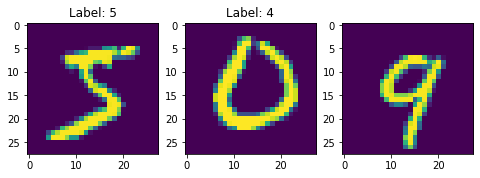

In [51]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title( "Label: {}". format(train_labels[0]))

plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title( "Label: {}". format(train_labels[25001]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])

plt.show()

In [52]:
# As usual we scalre our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255.
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [57]:
# Split training data to training and validation sets
x_train = train_images[0:50000]
x_val = train_images [50000: ]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}". format(x_train.shape)) # prints x_train: (50000, 28, 28)
print( "x_val: {}". format(x_val.shape)) # prints x val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000, )
print("y_val: {}". format(y_val.shape)) #prints y_val: (10000, )

# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0],new_dimension)
test_images = test_images.reshape(test_images. shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}". format(x_val.shape)) #prints x_val: (10000, 784)
print( "test_images: {}". format(test_images.shape)) #prints test images: (10000, 784)

#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)
x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


**MULTILAYER PERCEPTRON**

In [54]:
# inputs
# Placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

# Creating Model Architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  #first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  #second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

  #output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

logits = multilayer_perceptron(X, no_labels)

learning_rate = 0.01

# We define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

#initialize the variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

# Training the model

with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start:end], y_train[start:end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y:batch_y})
      start += batch_size
      end += batch_size
      # average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))

  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))






Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.8952000141143799


In [58]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))
model.compile(optimizer='adam', loss= tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=1000, validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 42us/sample - loss: 0.6936 - acc: 0.8151 - val_loss: 0.2554 - val_acc: 0.9266
Epoch 2/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.2354 - acc: 0.9321 - val_loss: 0.1882 - val_acc: 0.9457
Epoch 3/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1721 - acc: 0.9496 - val_loss: 0.1496 - val_acc: 0.9578
Epoch 4/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1345 - acc: 0.9610 - val_loss: 0.1257 - val_acc: 0.9646
Epoch 5/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.1096 - acc: 0.9688 - val_loss: 0.1172 - val_acc: 0.9654
Epoch 6/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0903 - acc: 0.9747 - val_loss: 0.1027 - val_acc: 0.9702
Epoch 7/20
50000/50000 [==============================] - 2s 32us/sample - loss: 0.0765 - acc: 0.9787 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

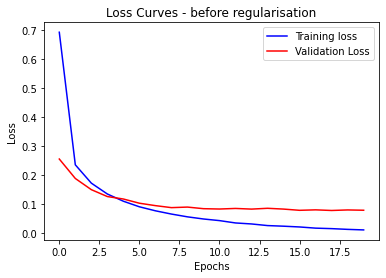

In [59]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [64]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 99us/sample - loss: 0.9918 - acc: 0.6841 - val_loss: 0.2955 - val_acc: 0.9181
Epoch 2/20
50000/50000 [==============================] - 4s 78us/sample - loss: 0.3812 - acc: 0.8875 - val_loss: 0.2043 - val_acc: 0.9414
Epoch 3/20
50000/50000 [==============================] - 2s 40us/sample - loss: 0.2833 - acc: 0.9176 - val_loss: 0.1654 - val_acc: 0.9538
Epoch 4/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.2337 - acc: 0.9310 - val_loss: 0.1403 - val_acc: 0.9606
Epoch 5/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.2027 - acc: 0.9412 - val_loss: 0.1259 - val_acc: 0.9633
Epoch 6/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1784 - acc: 0.9492 - val_loss: 0.1155 - val_acc: 0.9672
Epoch 7/20
50000/50000 [==============================] - 2s 37us/sample - loss: 0.1597 - acc: 0.9528 - val_loss: 0.

In [65]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0676 - acc: 0.9790
Test loss: 0.06759930957603501
Test accuracy: 0.9789999723434448


Text(0.5, 1.0, 'Loss Curves - after regularisation')

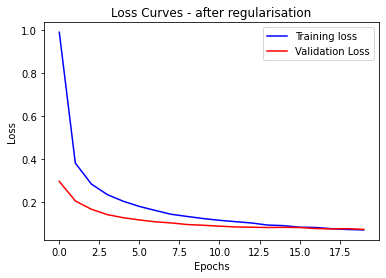

In [66]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

In [67]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[1000])) # Print out 9

9


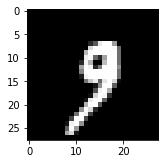

In [68]:
# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image

In [69]:
# You can try out others and play around with them
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[6700])) # Print out the number

4


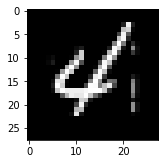

In [70]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image